### **K-Means Clustering : Unsupervised Machine Learning Algorithm**

#### Introduction

* K-Means is a powerful tool for finding groups (clusters) of similar data points in a dataset. 

* We'll use the well-known **Iris dataset** from `sklearn` to demonstrate the process, as it is a classic example of a dataset with naturally occurring, distinct clusters.

**What is K-Means Clustering?**

* K-Means is an **unsupervised learning algorithm**, which means it works on data without any predefined labels. 

* Its goal is to partition `'n'` observations into `'k'` clusters, where each observation belongs to the cluster with the nearest mean (or centroid). 

* The algorithm iteratively works to minimize the squared Euclidean distance between each data point and its assigned cluster centroid.

---

### Step 1: Importing Necessary Libraries

* First, we need to import the libraries we'll be using. 

* We'll need `numpy` for numerical operations, `pandas` for data handling, `matplotlib.pyplot` and `seaborn` for visualization, and `sklearn` for the K-Means algorithm and the Iris dataset.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

### Step 2: Loading and Exploring the Iris Dataset

* We will load the Iris dataset, which contains 150 samples of iris flowers, each with four features: `sepal length`, `sepal width`, `petal length`, and `petal width`. 

* The dataset has three species (`Setosa`, `Versicolour`, and `Virginica`), which serve as the true labels for evaluating our clustering results. 

* However, in our unsupervised learning task, we will not use these labels during the clustering process.

In [3]:
# Load the iris dataset
iris = load_iris()

# Create a DataFrame for better handling and visualization
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
print("\nDataset shape:")
print(df.shape)


Dataset shape:
(150, 4)


### Step 3: Finding the Optimal Number of Clusters (k) - The Elbow Method

* The most critical step in K-Means is choosing the right value for `'k'` (the number of clusters). 

* The **Elbow Method** is a common and intuitive technique for this.

**How does the Elbow Method work?**

  * The method plots the `WCSS` (Within-Cluster Sum of Squares) against the number of clusters (`k`). 
  
  * WCSS is the sum of squared distances between each data point and its cluster's centroid. 
  
  * As `'k'` increases, the WCSS will naturally decrease because each cluster will be smaller and tighter.
  
  * The `'elbow'` point on the plot is the value of `'k'` where the WCSS starts to decrease more slowly. 
  
  * This point is a good candidate for the optimal number of clusters.

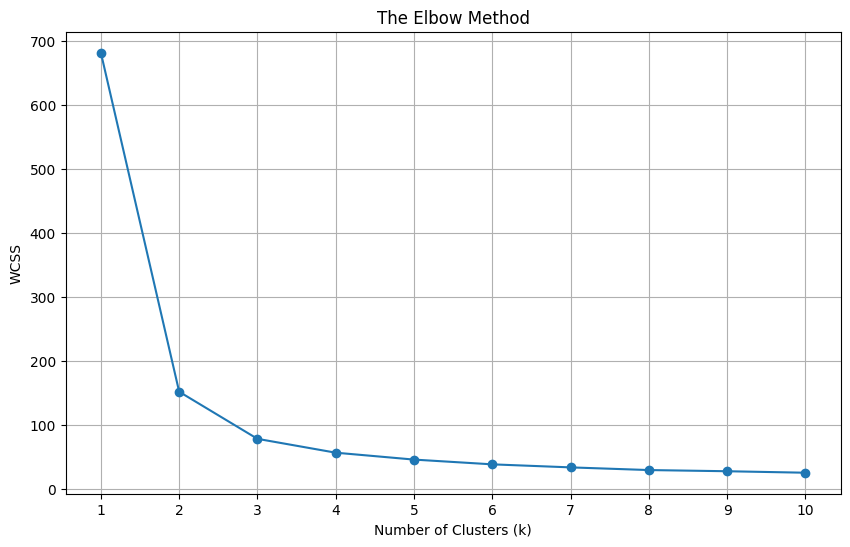

In [5]:
# Get the feature data
X = df.iloc[:, :].values

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

* From the plot, we can see a clear 'elbow' at k=3. 

* This suggests that 3 is the optimal number of clusters for our dataset, which aligns with the fact that the Iris dataset contains three distinct species. 

* The WCSS reduction is most significant up to k=3, after which the rate of decrease slows down considerably.

### Step 4: Applying K-Means with the Optimal 'k'

* Now that we've determined the optimal `k=3`, we'll run the K-Means algorithm one final time on our data to get the final clusters and their centroids.

In [6]:
# Instantiate and fit the KMeans model with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to our DataFrame
df['cluster'] = y_kmeans

print("First 5 rows with cluster labels:")
df.head()

First 5 rows with cluster labels:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Step 5: Visualizing the Final Clusters

* The final step is to visualize the clustered data. 

* Since the Iris dataset has four features, we can't visualize all of them at once in a 2D plot. 

* A common approach is to select two important features (e.g., petal length and petal width) to create a scatter plot. 

* This will give us a good sense of how well the algorithm separated the clusters.

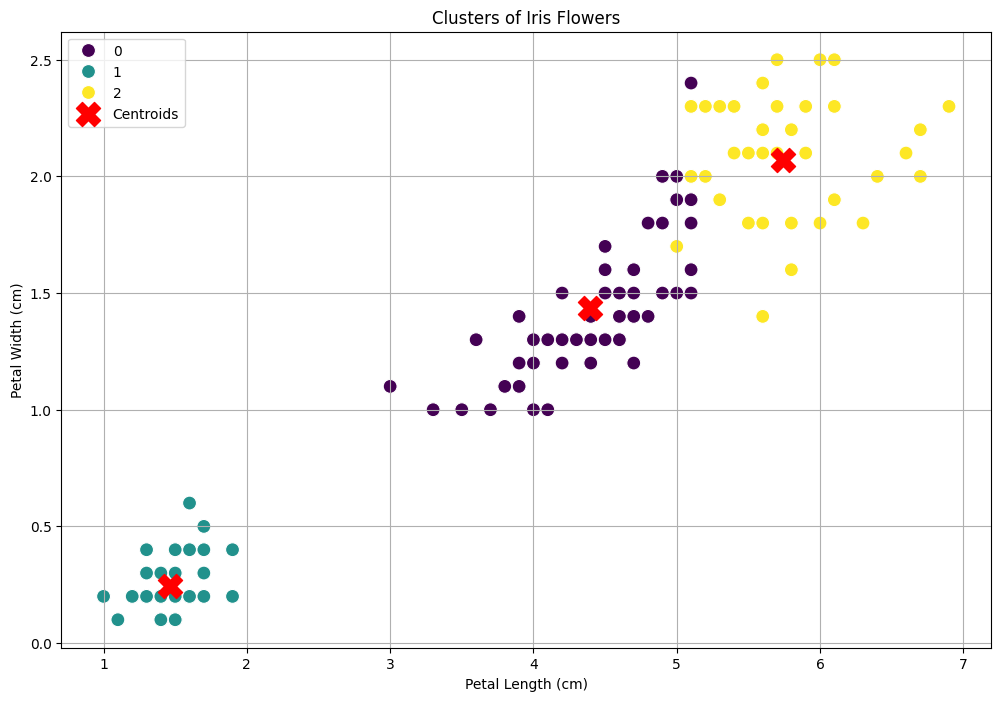

In [7]:
# Visualize the clusters using Petal Length and Petal Width
plt.figure(figsize=(12, 8))

# Scatter plot of the clusters based on Petal Length and Petal Width
sns.scatterplot(
    x='petal length (cm)', y='petal width (cm)', hue='cluster', data=df, 
    palette='viridis', s=100, legend='full'
)

# Plot the cluster centroids. We need to select the correct columns for the centroids.
plt.scatter(
    kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], 
    s=300, c='red', marker='X', label='Centroids'
)

plt.title('Clusters of Iris Flowers')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()

### Summary

* In this notebook, we've successfully implemented the K-Means clustering algorithm on a real-world dataset. We followed these key steps:

  1.  **Data Loading:** Loaded the classic Iris dataset from `sklearn`.

  2.  **Elbow Method:** Found the optimal number of clusters (k) by plotting the WCSS.
  
  3.  **Model Training:** Applied K-Means with the optimal `k=3` value.
  
  4.  **Final Visualization:** Visualized the final, well-defined clusters and their centroids.

* The process we followed here is a general workflow that can be applied to many different clustering problems. 

* The success of K-Means is heavily dependent on the quality of the data and the choice of `k`, and the Elbow Method is a reliable tool to help with this choice.

---

*Machine Learning - Python Notebook* by [*Prakash Ukhalkar*](https://github.com/prakash-ukhalkar)